# Trabajo Práctico 3 - Solana Cucher, Victoria Rosino, Florencia Ruiz


## Parte 1 - Análisis de la base de hogares y cálculo de pobreza

**Punto 1 - ¿Qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?**

Las variables principales analizadas en el TP2 son:

**CH04** Sexo: 1 = Varón; 2 = Mujer

**CH06** ¿Cuántos años cumplidos tiene?

**CH07** ¿Actualmente está...; 1 = ... unido?; 2 = ... casado?; 3 = ... separado/a o divorciado/a?; 4 = ... viudo/a?; 5 = ... soltero/a?

**CH08** ¿Tiene algún tipo de cobertura médica por la que paga o le descuentan?: 1 = Obra social (incluye PAMI); 2 = Mutual / prepaga / servicio de emergencia; 3 = Planes y seguros públicos; 4 = No paga ni le descuentan; 9 = Ns/Nr; 12 = Obra social y mutual / prepaga / servicio de emergencia; 13 = Obra social y planes y seguros públicos; 23 = Mutual / prepaga / servicio de emergencia / Planes y seguros  públicos; 123 = Obra social, mutual / prepaga / servicio de emergencia y planes y  seguros públicos

**NIVEL_ED** Nivel educativo: 1 = Primario incompleto (incluye educación especial); 2 = Primario completo:
3 = Secundario incompleto; 4 = Secundario completo; 5 = Superior universitario incompleto; 6 = Superior universitario completo; 7 = Sin instrucción; 9 = Ns/Nr

**ESTADO** Condición de actividad: 0 = Entrevista individual no realizada  (no respuesta al cuestionario 
 individual); 1 = Ocupado; 2 = Desocupado; 3 = Inactivo; 4 = Menor de 10 años
 
**CAT_INAC** Categoría de inactividad: 1 = Jubilado / Pensionado; 2 = Rentista; 3 = Estudiante; 4 = Ama de casa; 5 = Menor de 6 años; 6 = Discapacitado; 7 = Otros

**IPCF** Monto de ingreso per cápita familiar 

**P47T** Monto de ingreso total individual (sumatoria ingresos laborales y no laborales)

**ITF** Monto del ingreso total familiar

**P21** Monto de ingreso de la ocupación principal

**DECIFR** Nro de decil del ingreso total del hogar del TOTAL EPH

Además de estas variables, creemos que para predecir la pobreza sería muy útil incluir otras variables de la EPH. Esto permite un **enfoque muldimensional** de la pobreza, que vaya más alla de la definición basada únicamente en los ingresos. En primer lugar, es interesante incluir características habitacionales del hogar ya que el déficit de vivienda, es decir, las carencias físicas o de infraestructura del lugar de residencia, se relacionan con las condiciones de pobreza de los hogares. Los hogares pobres suele caracterizarse por tener una **vivienda deficitaria**. El indicador de vivienda deficitaria según el INDEC se construye a partir de las categorías Casa tipo B (tienen piso de tierra, no tienen provisión de agua por cañería dentro de la vivienda, o no disponen de baño con descarga de agua) y vivienda precaria (incluye casillas, piezas en inquilinato, locales no construidos para habitación y viviendas móviles). Las siguientes tres variables nos permiten tener una noción de este déficit de vivienda según lo define el INDEC:

**IV1** Tipo de vivienda: 1 = Casa; 2 = Departamento; 3 = Pieza de inquilinato; 4 = Pieza en hotel/pensión; 5 = Local no construido para habitación.

**IV3** Los pisos interiores son principalmente de...: 1 = Mosaico/baldosa/madera/cerámica/alfombra; 2 = Cemento/ladrillo fijo; 3 = Ladrillo suelto/tierra.

**IV8** ¿Tiene baño/letrina?: 1 = Si; 2 = No

Por otro lado, el **hacinamiento**, entendido como la relación entre la cantidad total de miembros del hogar y la cantidad de habitaciones de uso exclusivo del hogar, suele ser otro indicador relacionado con la pobreza. El INDEC en sus indicadores socioeconómicos considera la incidencia del hacinamiento crítico, en virtud de las limitaciones que este genera a los miembros de los hogares en materia de privacidad, salud y generación de entornos aptos para el estudio y la socialización. Se consideran hogares con hacinamiento crítico aquellos en los que habitan más de tres personas por cuarto. Las siguientes cuatro variables permiten tener una noción del hacinamiento:

**II1**: Cuántos ambientes/ habitaciones tiene este hogar para su uso exclusivo?

**IX_TOT** Cantidad de miembros del Hogar

**IX_MEN10** Cantidad de miembros del Hogar menores de 10 años

**IX_MAYEQ10** Cantidad de miembros del Hogar de 10 y más años

Por último, los hogares pobres suelen ser los principales **receptores de transferencias monetarias estatales o beneficios de la seguridad social**. Además, teniendo en cuenta que los montos de estas transferencias suelen ser relativamente bajos (considerando un contexto inflacionario), si un hogar solo tiene esto como fuente de ingreso es probable que se encuentre por debajo de la línea de pobreza. Por ello, incluimos las siguientes dos variables en el análisis:

**V2** ¿En los últimos tres meses, las personas de este hogar han vivido de alguna jubilación o pensión?: 1 = Si; 2 = No

**V5** ¿En los últimos tres meses, las personas de este hogar han vivido de subsidio o ayuda social (en dinero) del gobierno, iglesias, etc.?: 1 = Si; 2 = No

In [327]:
#Importamos todas las librerias necesarias para el trabajo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import os
import statistics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Punto 2**

In [328]:
#Importamos la base de microdatos de la EPH del primer trimestre de 2023
df_Ind = pd.read_excel("usu_individual_T123.xlsx")
print(df_Ind.head(5))

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  H15  \
0  TQRMNORVWHLMKOCDEOHCH00720228  2023          1          1           5    0   
1  TQRMNOPSTHKMKPCDEOHCH00781447  2023          1          1           1    1   
2  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           1    1   
3  TQRMNOQSXHMOKRCDEOHCH00803177  2023          1          1           2    1   
4  TQRMNOQYTHMNKSCDEOHCH00803178  2023          1          1           1    1   

   REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR      IPCF  \
0      44       N          91      112  ...     10.0        9   79700.0   
1      44       N          91      190  ...      6.0        5  180000.0   
2      44       N          91      134  ...      8.0        8  145000.0   
3      44       N          91      134  ...      8.0        8  145000.0   
4      44       N          91      120  ...     12.0       12       0.0   

   DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH

In [329]:
#Eliminamos las observaciones que no pertenezcan a los aglomerados correspondientes a CABA o GBA
df_Ind = df_Ind[(df_Ind["AGLOMERADO"]==32)|(df_Ind["AGLOMERADO"]==33)]
#Chequeamos el data frame 
print(df_Ind.head(5))

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
102  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           1   
103  TQRMNORUYHLMSMCDEIJAH00719364  2023          1          1           2   
104  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           1   
105  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           2   
106  TQRMNOSRQHJNSOCDEIJAH00802640  2023          1          1           3   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR  \
102    1       1       S          33     1545  ...      NaN        4   
103    1       1       S          33     1545  ...      NaN        4   
104    1       1       S          33     8423  ...      NaN        2   
105    1       1       S          33     8423  ...      NaN        2   
106    0       1       S          33     8423  ...      NaN        2   

         IPCF  DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH  
102  67500.00       5

**Punto 3**

In [330]:
#Importamos la base de datos de usuarios_hogar
df_Hogar = pd.read_excel('usu_hogar_T123.xlsx')
#Nos quedamos con los aglomerados de CABA y GBA también para esta base de datos
df_Hogar = df_Hogar[(df_Hogar['AGLOMERADO']==32)|(df_Hogar['AGLOMERADO']==33)]

In [331]:
#Unimos la base de datos de individuos con la de hogares 
df_IH = df_Ind.merge(df_Hogar, on = ['CODUSU', 'NRO_HOGAR'], how = 'left')
#Chequeamos la nueva base de datos
df_IH.head(20)

,CODUSU,ANO4_x,TRIMESTRE_x,NRO_HOGAR,COMPONENTE,H15,REGION_x,MAS_500_x,AGLOMERADO_x,PONDERA_x,...,GDECCFR_y,PDECCFR_y,ADECCFR_y,PONDIH_y,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5.0,NaN,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5.0,NaN,6,2540,1,0,2,0,0,0
2,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,1,1,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
3,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,2,1,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
4,TQRMNOSRQHJNSOCDEIJAH00802640,2023,1,1,3,0,1,S,33,8423,...,1.0,NaN,1,14082,2,1,98,0,0,0
5,TQRMNOSWQHJLQRCDEIJAH00796254,2023,1,1,1,1,1,S,33,2356,...,9.0,NaN,10,4090,1,0,98,0,0,0
6,TQRMNOSWQHJLQRCDEIJAH00796254,2023,1,1,2,1,1,S,33,2356,...,9.0,NaN,10,4090,1,0,98,0,0,0
7,TQRMNOPYVHLMRLCDEIJAH00719346,2023,1,1,1,1,1,S,33,2086,...,12.0,NaN,12,0,2,0,98,0,0,0
8,TQRMNOPYVHLMRLCDEIJAH00719346,2023,1,1,2,1,1,S,33,2086,...,12.0,NaN,12,0,2,0,98,0,0,0
9,TQRMNOPYVHLMRLCDEIJAH00719346,2023,1,1,3,1,1,S,33,2086,...,12.0,NaN,12,0,2,0,98,0,0,0


**Punto 4 y 5**

Las funciones y métodos que usamos para limpiar la base de datos son los siguientes:
- Usamos el método ".drop" pertenenciente a los DataFrames en pandas para borrar las columnas duplicadas debido al *merge* de las bases de datos. También usamos este método para borrar columnas con más del 80% de *missing values*.
- Usamos la función "drop_duplicates()" de pandas para borrar las observaciones duplicadas, en caso de que lo hubieran.
- Usamos la función "df_IH.isnull()" de pandas para crea un DataFrame booleano que detecte los *missigs values*
- Usamos el método ".loc" para seleccionar aquellas columnas que tienen valores "99" o "9". Estas observaciones deben ser borradas ya que se tratan de *missings values*
- Usamos la función "sns.boxplot" del paquete seaborn para identificar visualmente, mediante un boxplot, si algunas las variables relevantes de ingresos tienen valores *outliers*. 
- Usamos el método "quantile()" de la biblioteca pandas para calcular el cuantil correspondiente al valor 0.25 y 0.74. Luego, creamos una máscara booleana que identifica las filas en las que los valores de ciertas variables están dentro del rango definido por los límites inferior y superior. Eliminamos los valores atípicos según el criterio del rango intercuartílico.
- Usamos el método ".astype()" de pandas para cambiar el tipo de datos de las columnas del DataFrame.

In [332]:
# Realizaremos múltiples funciones propias y de numpy y pandas que ennumeraremos a continuación:
# 1)Observamos que existen columnas que están duplicadas en la base de datos, por lo que procedemos a quedarnos solo con una de ellas
for columna in df_IH: 
    print(columna)
    
df_IH.drop(df_IH.filter(regex='_x$').columns, axis=1, inplace=True)

# 2)Chequeamos si hay observaciones duplicadas y, una vez más, borramos las duplicadas
df_IH = df_IH.drop_duplicates()

CODUSU
ANO4_x
TRIMESTRE_x
NRO_HOGAR
COMPONENTE
H15
REGION_x
MAS_500_x
AGLOMERADO_x
PONDERA_x
CH03
CH04
CH05
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH14
CH15
CH15_COD
CH16
CH16_COD
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
IMPUTA
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
PP03C
PP03D
PP3E_TOT
PP3F_TOT
PP03G
PP03H
PP03I
PP03J
INTENSI
PP04A
PP04B_COD
PP04B1
PP04B2
PP04B3_MES
PP04B3_ANO
PP04B3_DIA
PP04C
PP04C99
PP04D_COD
PP04G
PP05B2_MES
PP05B2_ANO
PP05B2_DIA
PP05C_1
PP05C_2
PP05C_3
PP05E
PP05F
PP05H
PP06A
PP06C
PP06D
PP06E
PP06H
PP07A
PP07C
PP07D
PP07E
PP07F1
PP07F2
PP07F3
PP07F4
PP07F5
PP07G1
PP07G2
PP07G3
PP07G4
PP07G_59
PP07H
PP07I
PP07J
PP07K
PP08D1
PP08D4
PP08F1
PP08F2
PP08J1
PP08J2
PP08J3
PP09A
PP09A_ESP
PP09B
PP09C
PP09C_ESP
PP10A
PP10C
PP10D
PP10E
PP11A
PP11B_COD
PP11B1
PP11B2_MES
PP11B2_ANO
PP11B2_DIA
PP11C
PP11C99
PP11D_COD
PP11G_ANO
PP11G_MES
PP11G_DIA
PP11L
PP11L1
PP11M
PP11N
PP11O
PP11P
PP11Q
PP11R
PP11S
PP11T
P21
DECOCUR
IDECOCUR
RDECOCUR
GDECOCUR
PDE

In [333]:
# 3)Análizamos si hay observaciones atípicas y, a la vez, los missing values:

# a)Primero, chequeamos el porcentaje de valores faltantes para cada variable. 
# Vemos que alrededor del 80% de missing values en las variables,aproximadamente,se produce un salto. Es decir, el valor 80% de NA's es un buen punto de corte. 
percent_missing = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values = pd.DataFrame({'% Missings': percent_missing})
df_missing_values.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values.head(50)

,% Missings
PP09C_ESP,100.000000
PDECIFR_y,100.000000
PDECINDR,100.000000
IDECINDR,100.000000
PDECOCUR,100.000000
IDECOCUR,100.000000
PDECCFR_y,100.000000
IDECIFR_y,100.000000
IDECCFR_y,100.000000
IV3_ESP,99.855624


In [334]:
# Eliminamos del dataframe todas aquellas variablesa con más de 80% de valores faltantes.
min_count = int((80/100)*df_IH.shape[0] + 1) #El umbral es 6096 missings
min_count

# El siguiente comando localiza aquellas columnas que no cumplen con el umbral propuesto.
columnas_con_valores_faltantes = df_IH.columns[df_IH.isnull().sum() > min_count]
columnas_con_valores_faltantes
df_IH = df_IH.drop(columns=columnas_con_valores_faltantes)

# Chequeamos el dataframe
percent_missing2 = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values2 = pd.DataFrame({'% Missings': percent_missing2})
df_missing_values2.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values2.head(65)

,% Missings
PP06E,53.760336
PP05F,53.760336
PP07E,53.760336
PP07D,53.760336
PP07C,53.760336
PP07A,53.760336
PP06H,53.760336
PP06D,53.760336
PP06C,53.760336
PP06A,53.760336


In [335]:
# Filtramos las filas que tienen un 50% o más de missing.
columnas_mitad_missing = df_missing_values2[df_missing_values2['% Missings'] > 50]
pd.set_option('display.max_rows', None)
columnas_mitad_missing

# Chequeamos cuales son no categóricas para imputarle la media en los missings.
mitad_missing_no_cat = ['PP06D', 'PP06C', 'PP08D1', 'PP08J1', 'PP08J2', 'PP08J3', 'PP08F2', 'PP08F1', 'PP08D4', 'PP04B2', 'PP03D', 'PP3F_TOT', 'PP3E_TOT']
for columna in mitad_missing_no_cat:
    media = df_IH[columna].mean()  # Calcula la media de la columna
    df_IH[columna].fillna(media, inplace=True)  # Reemplaza los NA con la media

percent_missing3 = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values3 = pd.DataFrame({'% Missings': percent_missing3})
df_missing_values3.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values3

min_count_cat = int((50/100)*df_IH.shape[0] + 1)
min_count_cat
columnas_mitad_missing_cat = df_IH.columns[df_IH.isnull().sum() > min_count_cat]
columnas_mitad_missing_cat
df_IH = df_IH.drop(columns=columnas_mitad_missing_cat)

In [336]:
# Chequeamos el porcentaje de missings final
percent_missing4 = df_IH.isnull().sum() * 100 / len(df_IH)
df_missing_values4 = pd.DataFrame({'% Missings': percent_missing4})
df_missing_values4.sort_values('% Missings', inplace=True,ascending=False)
df_missing_values4.head(20)

,% Missings
P47T,0.315002
CH08,0.013125
II6_1,0.000000
II4_1,0.000000
II4_2,0.000000
II4_3,0.000000
II5,0.000000
II5_1,0.000000
II6,0.000000
CODUSU,0.000000


In [337]:
# b)Para analizar valores atípicos, calculamos los mínimos y máximos de ciertas variables
descrip_analisis = df_IH[['ITF_y','IPCF_y','P21','P47T','PONDIH_y','II1','IX_TOT','IX_MEN10', 'IX_MAYEQ10','DECIFR_y','CH06','DECOCUR']].describe()
print(descrip_analisis)

# Procedemos a eliminar las observaciones negativas de las variables: P21 (ingreso de la ocupación principal), P47T (ingreso total individual) y CH06 (edad)
df_IH = df_IH[(df_IH["P21"]>=0) & (df_IH["P47T"]>=0) & (df_IH["CH06"]>=0)]

# c)Siguiendo con el análisis de los valores atípicos, revisamos todos los valores que toman algunas otras variables relevantes (cuyos valores son finitos)
columnas_de_interes = ['IV1','IV3','IV8','II1','V2','V5','IX_TOT','IX_MEN10', 'IX_MAYEQ10','DECIFR_y','CH03','CH04','CH06','CH07','CH08','CH09','CH12','NIVEL_ED','ESTADO','CAT_INAC','DECOCUR']
for columna in df_IH.columns:
    valores_unicos = set(df_IH[columna])
    print(f"Valores únicos de {columna}: {valores_unicos}")
    
# Observamos que ciertas columnas incluyen valores como 9 o 99 que implican "no sabe/no contesta". En particular, las variables con un 99 son II1 y CH12; y las variables con 9 son V2, V5, CH07, CH09. 
# Decidimos eliminar estas observaciones ya que indican lo mismo que un missing value. 
variables_99 = ['II1','CH12','IV2','VII1_1']
df_IH = df_IH.loc[~df_IH[variables_99].eq(99).any(axis=1)]
variables_9 = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12', 'V13','V14','V15', 'V16', 'V17','V18','V19_A','V19_B','CH07', 'CH08', 'CH10', 'CH11', 'CH15', 'CH16', 'CAT_OCUP', 'IV4','II7']
df_IH = df_IH.loc[~df_IH[variables_9].eq(9).any(axis=1)]

              ITF_y        IPCF_y           P21          P47T      PONDIH_y  \
count  7.619000e+03  7.619000e+03  7.619000e+03  7.595000e+03   7619.000000   
mean   1.384079e+05  4.767827e+04  3.772887e+04  5.722302e+04   2074.901956   
std    3.349417e+05  9.256659e+04  8.173585e+04  1.590807e+05   2545.155855   
min    0.000000e+00  0.000000e+00 -9.000000e+00 -9.000000e+00      0.000000   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00      0.000000   
50%    7.500000e+04  2.050000e+04  0.000000e+00  0.000000e+00   1355.000000   
75%    2.000000e+05  6.500000e+04  4.000000e+04  8.000000e+04   3638.000000   
max    1.099000e+07  2.198000e+06  1.200000e+06  1.075000e+07  20663.000000   

               II1       IX_TOT     IX_MEN10   IX_MAYEQ10     DECIFR_y  \
count  7619.000000  7619.000000  7619.000000  7619.000000  7619.000000   
mean      3.056307     3.696417     0.601391     3.095026     8.460822   
std       1.928454     1.852985     0.947037     1.441937     3.81

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


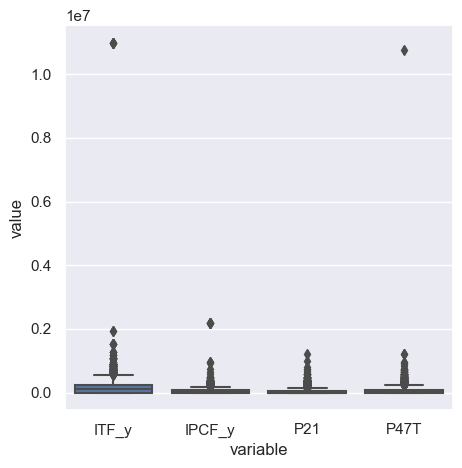

In [338]:
# 4) Verificamos la existencia si hay outliers en las variables de ingresos: ITF_y, IPCF_y, P21, P47T
variables_outliers = ['ITF_y', 'IPCF_y', 'P21', 'P47T']
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_IH[variables_outliers]))

# En el boxplot graficado podemos observar que las variables analizadas contienen outliers por lo que decidimos eliminarlos de la base de datos
Q1 = df_IH[variables_outliers].quantile(0.25)
Q3 = df_IH[variables_outliers].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

mask = (df_IH[variables_outliers] >= limite_inferior) & (df_IH[variables_outliers] <= limite_superior)
df_IH[variables_outliers] = df_IH[variables_outliers][mask]

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='variable', ylabel='value'>

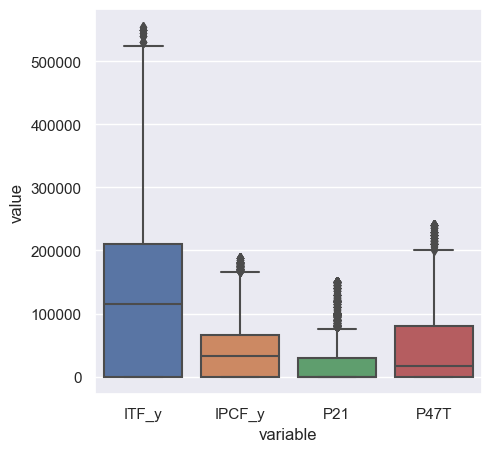

In [339]:
# Repetimos el gráfico anterior para asegurarnos que dichos valores extremos hayan sido eliminados.
variables_outliers = ['ITF_y', 'IPCF_y', 'P21', 'P47T']
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x="variable", y="value", data=pd.melt(df_IH[variables_outliers]))
# Efectivamente, si bien vemos que aún siguen existiendo algunos puntos en los gráficos representando valores por fuera de la distribución estándar, estas observaciones /
# no se alejan tanto de la media del ingreso como sí pasaba en la figura anterior.

In [340]:
# 5)Por último, examinamos el "tipo" de cada variable del dataframe
tipos = df_IH.dtypes
for columna, tipo in tipos.items():
    print(f"Columna '{columna}': {tipo}") 

# Luego, transformamos las variables que correspondan al tipo "categóricas" según el diseño de registro a este "tipo" respectivamente
categóricas = ['IV1','IV3','IV8','V2','V5','CH03','CH04','CH07','CH08','CH09','CH12','NIVEL_ED','ESTADO','CAT_INAC']
df_IH[categóricas] = df_IH[categóricas].astype('category')

# En último lugar, eliminamos a la variable "CH05" y la variable "MAS_500" ya que se encuentran en formato "string"
variables_a_eliminar = ['CH05','MAS_500_y']
df_IH = df_IH.drop(columns=variables_a_eliminar)

Columna 'CODUSU': object
Columna 'NRO_HOGAR': int64
Columna 'COMPONENTE': int64
Columna 'H15': int64
Columna 'CH03': int64
Columna 'CH04': int64
Columna 'CH05': object
Columna 'CH06': int64
Columna 'CH07': int64
Columna 'CH08': float64
Columna 'CH09': int64
Columna 'CH10': int64
Columna 'CH11': int64
Columna 'CH12': int64
Columna 'CH13': int64
Columna 'CH15': int64
Columna 'CH16': int64
Columna 'NIVEL_ED': int64
Columna 'ESTADO': int64
Columna 'CAT_OCUP': int64
Columna 'CAT_INAC': int64
Columna 'PP02C1': int64
Columna 'PP02C2': int64
Columna 'PP02C3': int64
Columna 'PP02C4': int64
Columna 'PP02C5': int64
Columna 'PP02C6': int64
Columna 'PP02C7': int64
Columna 'PP02C8': int64
Columna 'PP02E': int64
Columna 'PP02H': int64
Columna 'PP02I': int64
Columna 'PP03D': float64
Columna 'PP3E_TOT': float64
Columna 'PP3F_TOT': float64
Columna 'PP04B2': float64
Columna 'PP06C': float64
Columna 'PP06D': float64
Columna 'PP08D1': float64
Columna 'PP08D4': float64
Columna 'PP08F1': float64
Columna 'PP0

**Punto 6**

Las cinco variables que consideramos relevantes para predecir la pobreza son: 

**NIVEL_ED**: nivel educativo alcanzado por el encuestado 

**ESTADO**: estado de actividad ocupacional

**IX_TOT**: cantidad de miembros en el hogar

**IV3**: material de los pisos de la vivienda 

**IV7**: de dónde proviene el agua de la vivienda

Estas cincos variables permiten abarcar diferentes dimensiones (educación, mercado laboral, hacinamiento y características de vivienda) que nos permitirían una predicción completa de la pobreza. 

            IX_TOT
count  5357.000000
mean      3.883890
std       1.914031
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max      13.000000
   Frecuencia_NIVEL_ED  Frecuencia_ESTADO  Frecuencia_IV3  Frecuencia_IV7
3                 1248             2334.0             7.0            11.0
4                 1071              829.0            10.0            12.0
1                  821             1955.0          4600.0          4159.0
2                  649              239.0           740.0          1175.0
6                  583                NaN             NaN             NaN
5                  569                NaN             NaN             NaN
7                  416                NaN             NaN             NaN


/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


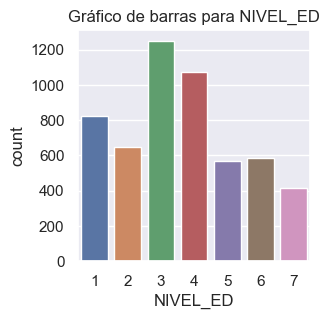

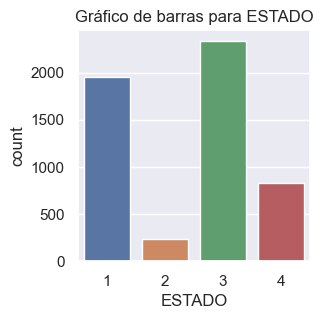

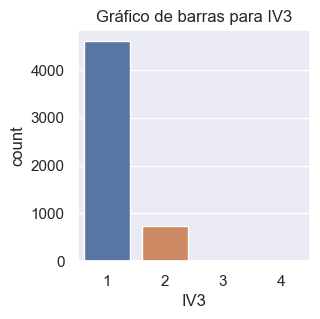

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


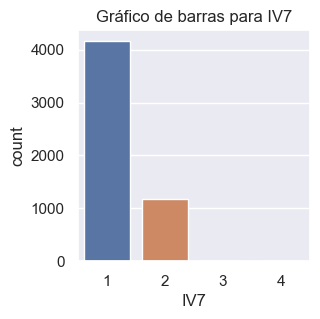

In [341]:
# La variable IX_TOT posee formato numérico mientras que el resto de las variables elegida son categóricas. Para IX_TOT prese la media, el desvío estándar, el mínimo, máximo, entre otras estadísticas.
summary = df_IH[['IX_TOT']].describe()
print(summary)

# Para las variables categóricas elegidas analizamos la frencuencia de sus datos
variables_cat_6 = ['NIVEL_ED','ESTADO','IV3','IV7']
frecuencias = pd.DataFrame()
for variable in variables_cat_6:
    frecuencia = df_IH[variable].value_counts()
    frecuencia.name = f'Frecuencia_{variable}'
    frecuencias = pd.concat([frecuencias, frecuencia], axis=1, sort=False)

print(frecuencias)

for variable in variables_cat_6:
    plt.figure(figsize=(3, 3))
    sns.countplot(x=variable, data=df_IH)
    plt.title(f'Gráfico de barras para {variable}')
    plt.show()

**Estadísticas descriptivas**

En cuanto a la **cantidad de miembros del hogar**, podemos destacar que poseemos un muestra muy diversa: el hogar más pequeño cuenta con una sola persona en él, mientras que el más poblado tiene a trece personas conviviendo bajo un mismo techo. De todas formas, en promedio, una vivienda de nuestra muestra alberga a casi cuatro personas (3,789). 

Con respecto al **nivel educativo**, podemos observar que la mayoría de nuestras observaciones se concentran en los niveles educativos intermedios, es decir, en el nivel 3 (secundaria incompeta) y 4 (secundaria completa). La distribución de esta variable podría asemejarse a una normal, centrada en los valores anteriormente mencionados y, desalentadoramente, corrida hacia la izquierda.

La variable de **estado**, nos muestra que la mayoría de los individuos encuestados se encuentran ocupados o inactivos. Una menor proporción de la muestra son menores de 10 años y, muy pocos son desempleados. 

En último lugar, las variables **IV3** y **IV7** que reportaban información sobre las condiciones de la vivienda, demuestran que una minoría de los encuestados posee pisos de cemento o ladrillo fijo u obtiene agua de una bomba a motor. Es decir, la menor proporción de la muestra vive en condiciones precarias.

**Punto 7**

In [342]:
# Importamos la base de datos "tabla_adultos_equiv.xlsx"
df_adultos = pd.read_excel("tabla_adulto_equiv.xlsx",skiprows=3,nrows=24) 
df_adultos.drop(0, inplace = True)

# Reseteamos el índice 
df_adultos.reset_index(drop=True,inplace=True)
display(df_adultos)

# Definimos las unidades de adulto equivalente para las edades que están agrupadas 
for i in range(0,18):
    df_adultos.loc[i,"Edad"]= i 
#De 18 a 29 años le atribuímos el valor 0.76 a las mujeres y 1.02 a los hombres
for i in range(18,30): 
    df_adultos.loc[i]= [i,0.76,1.02] 
#De 30 a 45 años le atribuímos el valor 0.77 a las mujeres y 1 a los hombres
for i in range(30,46): 
    df_adultos.loc[i]= [i,0.77,1] 
#De 46 a 60 años le atribuímos el valor 0.76 a las mujeres y 1 a los hombres
for i in range(46,61):
    df_adultos.loc[i]= [i,0.76,1] 
#De 61 a 75 años le atribuímos el valor 0.67 a las mujeres y 0.83 a los hombres
for i in range(61,76): 
    df_adultos.loc[i]= [i,0.67,0.83]
# A los mayores de 75 años le atribuímos el valor 0.63 a las mujeres y 0.74 a los hombres
for i in range(76,106): 
    df_adultos.loc[i]= [i,0.63,0.74] 

df_adultos = df_adultos.rename(columns={"Edad":"CH06"})
print(df_adultos)

# Armamos una base de datos para las mujeres y otras para los varones
df_equiv_mujeres = df_adultos[["CH06","Mujeres"]].copy()
df_equiv_mujeres["CH04"] = 2 #El 2 implica que son mujeres según la variable CH04 de la EPH
df_equiv_mujeres = df_equiv_mujeres.rename(columns={"Mujeres":"adulto_equiv"})
display(df_equiv_mujeres)

df_equiv_varones = df_adultos[["CH06","Varones"]].copy()
df_equiv_varones["CH04"] = 1 #El 1 implica que son varones según la variable CH04 de la EPH
df_equiv_varones = df_equiv_varones.rename(columns={"Varones":"adulto_equiv"})
display(df_equiv_varones)

# Unimos las dos bases creadas anteriormente. Luego juntamos la nueva base con la EPH
df_equiv_total = pd.concat([df_equiv_mujeres, df_equiv_varones], ignore_index=True)
display(df_equiv_total)
df_IH2 = df_IH.merge(df_equiv_total, on=["CH06","CH04"], how = "left")

# Chequeamos que haya dado bien
print(df_IH2[["CH06","CH04","adulto_equiv"]].head(10))

# Sumamos la nueva columna "adulto_equiv" para todas las personas que pertenecen al mismo hogar
df_IH3 = df_IH2.groupby(["NRO_HOGAR","CODUSU"]).agg({"adulto_equiv":"sum"})
df_IH3.reset_index(inplace = True)
df_IH3 = df_IH3.rename(columns={"adulto_equiv":"ad_equiv_hogar"})
df_IH_final = df_IH2.merge(df_IH3, on=["NRO_HOGAR","CODUSU"], how = "left")

,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


      CH06  Mujeres  Varones
0        0     0.35     0.35
1        1     0.37     0.37
2        2     0.46     0.46
3        3     0.51     0.51
4        4     0.55     0.55
5        5     0.60     0.60
6        6     0.64     0.64
7        7     0.66     0.66
8        8     0.68     0.68
9        9     0.69     0.69
10      10     0.70     0.79
11      11     0.72     0.82
12      12     0.74     0.85
13      13     0.76     0.90
14      14     0.76     0.96
15      15     0.77     1.00
16      16     0.77     1.03
17      17     0.77     1.04
18      18     0.76     1.02
19      19     0.76     1.02
20      20     0.76     1.02
21      21     0.76     1.02
22      22     0.76     1.02
23    23.0     0.76     1.02
24    24.0     0.76     1.02
25    25.0     0.76     1.02
26    26.0     0.76     1.02
27    27.0     0.76     1.02
28    28.0     0.76     1.02
29    29.0     0.76     1.02
30    30.0     0.77     1.00
31    31.0     0.77     1.00
32    32.0     0.77     1.00
33    33.0    

,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
5,5,0.60,2
6,6,0.64,2
7,7,0.66,2
8,8,0.68,2
9,9,0.69,2


,CH06,adulto_equiv,CH04
0,0,0.35,1
1,1,0.37,1
2,2,0.46,1
3,3,0.51,1
4,4,0.55,1
5,5,0.60,1
6,6,0.64,1
7,7,0.66,1
8,8,0.68,1
9,9,0.69,1


,CH06,adulto_equiv,CH04
0,0,0.35,2
1,1,0.37,2
2,2,0.46,2
3,3,0.51,2
4,4,0.55,2
5,5,0.60,2
6,6,0.64,2
7,7,0.66,2
8,8,0.68,2
9,9,0.69,2


  CH06  CH04  adulto_equiv
0   65     2          0.67
1   70     1          0.83
2   36     1          1.00
3   28     2          0.76
4    9     2          0.69
5   59     1          1.00
6   55     1          1.00
7   18     1          1.02
8   44     1          1.00
9   10     2          0.70


**Punto 8**

In [343]:
# Encontramos a las personas que no respondieron cual es su ITF y los diferenciamos en otra base de datos
cant_ITF_missing = (df_IH_final['ITF_y'] == 0).sum()
print("La cantidad de personas que no reportaron su ITF es",cant_ITF_missing)

# Hacemos una base de datos con las personas que reportaron su ITF y otra con las que no lo hicieron
respondieron = df_IH_final[df_IH_final['ITF_y']!= 0]
norespondieron = df_IH_final[df_IH_final['ITF_y']== 0]

# Chequeamos que los Data Frames se hayan creado correctamente y reseteamos su índice
respondieron.reset_index(inplace = True)
norespondieron.reset_index(inplace = True)
print(respondieron['ITF_y'].head(5))
print(norespondieron['ITF_y'].head(5))

La cantidad de personas que no reportaron su ITF es 1610
0    135000.0
1    135000.0
2     70000.0
3     70000.0
4     70000.0
Name: ITF_y, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ITF_y, dtype: float64


In [344]:
# Agregamos la columna de "ingreso necesario" al Data Frame de "respondieron"
respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*(57371.05)

/var/folders/xd/hjpvt78n0mj10w5ttb2hmyfm0000gn/T/ipykernel_30298/614016581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar']*(57371.05)


**Punto 9**

In [345]:
# Generamos una columna nueva llamada "pobre" para identificar a aquellos que no alcanzan el ingreso necesario
respondieron['pobre'] = (respondieron['ITF_y'] < respondieron['ingreso_necesario']).astype(int)
print(respondieron[['ITF_y','ingreso_necesario','pobre']])

# Contamos el número de pobres que hay en el dataframe "respondieron"
cantidad_pobres = respondieron['pobre'].value_counts()
cantidad_pobres = cantidad_pobres.get(1, 0)
print("La cantidad de pobres es",cantidad_pobres)

# Calculamos la proporción de pobres sobre el total 
pobres_prop=cantidad_pobres/len(respondieron)
print("La tasa pobreza en esta muestra es de:", round(pobres_prop*100,2), "%")

         ITF_y  ingreso_necesario  pobre
0     135000.0         86056.5750      0
1     135000.0         86056.5750      0
2      70000.0        140559.0725      1
3      70000.0        140559.0725      1
4      70000.0        140559.0725      1
5     360000.0        114742.1000      0
6     360000.0        114742.1000      0
7     320000.0         57371.0500      0
8     206500.0         86056.5750      0
9     206500.0         86056.5750      0
10    122000.0        190471.8860      1
11    260000.0        138837.9410      0
12    260000.0        138837.9410      0
13    260000.0        138837.9410      0
14    122000.0        190471.8860      1
15    122000.0        190471.8860      1
16    122000.0        190471.8860      1
17    122000.0        190471.8860      1
18    327200.0        291444.9340      0
19    327200.0        291444.9340      0
20    327200.0        291444.9340      0
21    327200.0        291444.9340      0
22    327200.0        291444.9340      0
23    327200.0  

/var/folders/xd/hjpvt78n0mj10w5ttb2hmyfm0000gn/T/ipykernel_30298/2139126071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = (respondieron['ITF_y'] < respondieron['ingreso_necesario']).astype(int)


**Punto 10**

In [346]:
#Nos quedamos con una sola observación por hogar, y usando el ponderador para expandir la muestra, guardamos el total de pobres y no pobres en un data frame
contador_pobreza = respondieron.groupby(['CODUSU', 'NRO_HOGAR'])\
                 .agg({'pobre': 'mean', 'PONDIH_y': 'sum'}) \
                 .groupby('pobre')['PONDIH_y'] \
                 .sum() \
                 .reset_index() \
                 .rename(columns={'PONDIH_y': 'tot_PONDIH_y'})

# Calculamos la tasa de pobreza
cant_pobres = contador_pobreza.loc[1,'tot_PONDIH_y']
total_pob = contador_pobreza['tot_PONDIH_y'].sum()
tasa_pobreza_GBA = cant_pobres / total_pob
print("La tasa de hogares debajo de la línea de pobreza en esta muestra es de:", round(tasa_pobreza_GBA*100,2), "%")

# La tasa de hogares debajo de la línea de pobreza es mayor que la que reporta el INDEC de 30,3% en el primer semestre de 2023.
# En particular, la diferencia entre ambas tasas es de 11.91 puntos porcentuales.

La tasa de hogares debajo de la línea de pobreza en esta muestra es de: 42.21 %


## Parte 2 - Construcción de funciones

**Punto 1**

In [347]:
def evalua_metodo(X_train, X_test, y_train, y_test, model, k=3, hiperparam=1, random_state=None, p=None):
    '''
    La función evalua_metodo ajusta primero el modelo con los datos de entrenamiento (según el método elegido) y realiza las predicciones sobre la muestra de prueba.
    Luego calcula y devuelve las siguientes métricas (para el método elegido -Regresión logística, Análisis de discriminante lineal, KNN-): 
    - Matriz de confusión
    - Valores de AUC
    - Accuracy score 
    - False Negative Rate
    - True Negative Rate
    - False Positve Rate
    - True Positive Rate
    También agregamos el Error Cuadrático Medio, necesario para el método de cross-validation.
    Cuando el método es regresión logística, la función también devuelve los coeficientes estimados para cada variable.
    Lo anterior permite identificar los coeficientes nulos y, por lo tanto, qué variables son relevantes según LASSO o Ridge.
    Obs: para la regresión logística tenemos en cuenta el parámetro de regularización para las funciones siguientes. 
    '''
    coeficientes=None
    
    if p is not None:
        penalty = p
   
    if model==KNeighborsClassifier:
        
        y = model(n_neighbors=k).fit(X_train, y_train)
        
    elif model== LogisticRegression:
        
        y = model(C=1/hiperparam, penalty = p, solver = 'saga', random_state = random_state).fit(X_train, y_train)
        coef = y.coef_
        coef_column = coef.reshape((-1, 1))
       
        coeficientes = pd.DataFrame(coef_column, index= X_train.columns)
        coeficientes = coeficientes.reset_index()
        coeficientes = coeficientes.set_axis(['Variable', 'Coeficiente'], axis=1)

    elif model== LinearDiscriminantAnalysis:
        
        y = model().fit(X_train, y_train)
        
    else:
        
        y = model.fit(X_train, y_train)
    
    y_pred = y.predict(X_test)
      
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fnr = fn/(tp+fn)
    tnr =tn/(fp+tn)
    fpr2 = fp/(fp+tn)
    tpr2 = tp/(tp+fn)
    ecm = mean_squared_error(y_test, y_pred)

    metricas = pd.DataFrame({'Modelo':[model],
        'Matriz de Confusión': [matriz_confusion],
        'AUC': [auc],
        'Accuracy Score': [accuracy],
        'False Negative Rate': [fnr],
        'True Negative Rate': [tnr],
        'False Positve Rate': [fpr2],
        'True Positive Rate': [tpr2], 
        'ECM':[ecm]
    })

    return metricas, coeficientes

**Punto 2**

In [348]:
def cross_validation(model, k_cv, x, y, standard=False, random_state = None):
    ''' 
    La función cross_validation realiza la validación cruzada con k_cv iteraciones.
    Contiene la opción de estandarización (el default es False). Si se aplica la estandarización, los conjuntos de datos x_train y x_test se estandarizan utilizando el StandardScaler creado. 
    La función llama a la función evalua_metodo en cada iteración (para las k_cv distintas particiones). Así, realiza la validación cruzada para el método elegido (Regresión logística, Análisis de discriminante lineal o KNN).
    La función devuelve el ECM promedio y los ECM de las k_cv estimaciones realizadas por el método de cross-validation. 
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
    sc = StandardScaler()
    
    if standard==True:
    
        kf = KFold(n_splits=k_cv, shuffle=True, random_state=random_state)

        ecms = []
        coefs = []

        for i, (train_index, test_index) in enumerate(kf.split(x)):   
            x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]  
            y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

            x_train_transformed = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)
            x_test_transformed = pd.DataFrame(sc.transform(x_test),index=x_test.index, columns=x_test.columns)

            resultado_matriz = evalua_metodo(x_train_transformed, x_test_transformed, y_train, y_test, model, random_state)[0]
            ecm = resultado_matriz['ECM'][0]
            ecms.append(ecm)
            
        mean_ecms = statistics.mean(ecms)

        return mean_ecms, ecms

**Punto 3**

In [349]:
def evalua_config(hiperparam, k_cv, x, y, l1=3, random_state=None):
    '''
    La función evalua_config toma una lista de valores de hiperparámetros y las k_cv particiones para cross-validation. Para cada valor del hiperparámetro, crea un clasificador de regresión logística.
    Para evaluar ese clasificador usando la estandarización de los datos (standard=True).
    Luego utiliza la función cross_validation para el caso en que el método de regularización sea LASSO (l1=1), Ridge (l1=0) o una comparación entre ambos (l1=3 - default).
    
    Para los casos en los que se evalúan LASSO y Ridge por separado, la función devuelve el hiperparámetro óptimo (con menor ECM) e indica si estamos usando LASSO o Ridge. 
    Además devuelve un diccionario, donde las "key" son los hiperparámetros evaluados y los valores corresponden a la distribución de los ECM en cada partición.
    En el caso de LASSO, también se devuelve los coeficientes de las variables X para cada hiperparámetro considerado.
    
    En el caso en el que se compara entre LASSO y Ridge, la función determina cuál es el hiperparámetro que minimiza el ECM entre los dos métodos de regularización, indica el método asociado a ese hiperparámetro y 
    devuelve un diccionario donde la "key" es un hiperparámetros y su valor es el promedio de los ECM asociado a ese hiperparámetro.
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
    config_optimo_LASSO = {}
    config_optimo_Ridge = {}
    
    config_optimo_LASSO2 = {}
    config_optimo_Ridge2 = {}
    
    distribucion_LASSO = {}
    distribucion_Ridge = {}
    coeficientes_LASSO = {}

    min_LASSO2 = None
    min_Ridge2 = None 
    
    for config in hiperparam:
        if l1 == 1:
            clasificador_LASSO = LogisticRegression(C=1/config, penalty="l1", solver="saga", random_state=random_state)

            resultado_cv_LASSO = cross_validation(clasificador_LASSO, k_cv, x, y, standard=True, random_state=random_state)

            ecms_LASSO = resultado_cv_LASSO[0]
            config_optimo_LASSO[config] = ecms_LASSO

            distribucionL = resultado_cv_LASSO[1]
            distribucion_LASSO[config] = distribucionL     

        elif l1 == 0:
            clasificador_Ridge = LogisticRegression(C=1/config, penalty="l2", solver="saga", random_state=random_state)
            
            resultado_cv_Ridge = cross_validation(clasificador_Ridge, k_cv, x, y, standard=True, random_state=random_state)
            ecms_Ridge = resultado_cv_Ridge[0]
            config_optimo_Ridge[config] = ecms_Ridge
            
            distribucionR = resultado_cv_Ridge[1]
            distribucion_Ridge[config] = distribucionR

        else:
            clasificador_LASSO2 = LogisticRegression(C=1/config, penalty="l1", solver="saga", random_state=random_state)
            ecms_LASSO2 = cross_validation(clasificador_LASSO2, k_cv, x, y, standard=True, random_state=random_state)[0]
            config_optimo_LASSO2[config] = ecms_LASSO2
            
            clasificador_Ridge2 = LogisticRegression(C=1/config, penalty="l2", solver="saga", random_state=random_state)
            ecms_Ridge2 = cross_validation(clasificador_Ridge2, k_cv, x, y, standard=True, random_state=random_state)[0]
            config_optimo_Ridge2[config] = ecms_Ridge2
   
    if bool(config_optimo_LASSO2) and bool(config_optimo_Ridge2):
        min_LASSO2 = min(config_optimo_LASSO2.items(), key=lambda x: x[1])
        min_Ridge2 = min(config_optimo_Ridge2.items(), key=lambda x: x[1])
        ecm_min = min(min_LASSO2[1], min_Ridge2[1])
        if ecm_min == min_LASSO2[1]:
            config_optimo = min_LASSO2[0]
        else: 
            config_optimo = min_Ridge2[0]

    if l1 == 0:
        return min(config_optimo_Ridge, key=config_optimo_Ridge.get), 'Ridge', distribucion_Ridge
    elif l1 == 1:
        return min(config_optimo_LASSO, key=config_optimo_LASSO.get), 'LASSO', distribucion_LASSO, coeficientes_LASSO
    else:
        if config_optimo == min_LASSO2[0]:
            return config_optimo, 'LASSO', config_optimo_LASSO2, config_optimo_Ridge2,
        else:
            return config_optimo, 'Ridge', config_optimo_Ridge2, config_optimo_LASSO2

**Punto 4**

In [350]:
def evalua_multiples_metodos (k_cv, k_KNN, hiperparams, x_train, x_test , y_train, y_test, x, y, random_state=None):
    '''
    La función "evalua_multiples_metodos" evalúa los modelos de Regresión Logística, Análisis de Discriminante Lineal y K-Nearest Neighbors. 
    Toma como input el número de particiones de cross-validation, el número de vecinos cercanos, un conjunto de hiperparámetros y datos de entrenamiento y test.
    Luego, realiza un loop sobre los modelos dados, ajusta cada modelo según el tipo y los parámetros requeridos y evalúa su desempeño utilizando métricas como AUC, precisión, tasas de falsos positivos y negativos, y ECM. 
    Finalmente, organiza los resultados en un DataFrame que contiene las métricas de evaluación de cada modelo con sus respectivos hiperparámetros.
    
    Obs: la función permite usar una semilla para que no se alteren los resultados al correr el código repetidas veces. 
    '''
       
    modelos = ['Regresión logística','Análisis de discriminante lineal','KNN']
       
    columnas=["Modelo", "Hiperparametro", "AUC", "Accuracy", "False Negative Rate", "True Negative Rate", "False Positve Rate", "True Positive Rate", "ECM", "k_KNN"]
    matriz = pd.DataFrame(columns=columnas)
    
    for modelo in modelos:
    
        if modelo == 'Regresión logística':
            hiperparam_optimo = evalua_config(hiperparams, k_cv ,x, y, 3, random_state)[:2] 
            metricas_RL= evalua_metodo(x_train, x_test, y_train, y_test, LogisticRegression, hiperparam_optimo[0], random_state)[0]
            resultados = [modelo, hiperparam_optimo, metricas_RL['AUC'][0], metricas_RL['Accuracy Score'][0], metricas_RL['False Negative Rate'][0], metricas_RL['True Negative Rate'][0], metricas_RL['False Positve Rate'][0], metricas_RL['True Positive Rate'][0], metricas_RL['ECM'][0], "NA"]
            matriz.loc[len(matriz)] = resultados
    
        elif modelo == 'Análisis de discriminante lineal':
            metricas_adl = evalua_metodo(x_train, x_test, y_train, y_test, LinearDiscriminantAnalysis, random_state)[0]
            resultados = [modelo,'NA', metricas_adl['AUC'][0], metricas_adl['Accuracy Score'][0], metricas_adl['False Negative Rate'][0], metricas_adl['True Negative Rate'][0], metricas_adl['False Positve Rate'][0], metricas_adl['True Positive Rate'][0], metricas_adl['ECM'][0], "NA"]
            matriz.loc[len(matriz)] = resultados
                      
        elif modelo == 'KNN':
            metricas_knn = evalua_metodo(x_train, x_test, y_train, y_test, KNeighborsClassifier, k_KNN, random_state)[0]
            resultados = [modelo,'NA', metricas_knn['AUC'][0], metricas_knn['Accuracy Score'][0], metricas_knn['False Negative Rate'][0], metricas_knn['True Negative Rate'][0], metricas_knn['False Positve Rate'][0], metricas_knn['True Positive Rate'][0], metricas_knn['ECM'][0], k_KNN]
            matriz.loc[len(matriz)] = resultados     
    
    return matriz

## Parte 3 - Clasificación y regularización

**Punto 1**

In [351]:
#Eliminamos todas las variables relacionadas a ingresos de las dos bases de datos 
columnas_ingresos = ["P21","PP08D1","PP08D4","PP08F1","PP08F2","PP08J1","PP08J2","PP08J3","DECOCUR","RDECOCUR","GDECOCUR","ADECOCUR","PONDIIO","TOT_P12","P47T","DECINDR","RDECINDR","GDECINDR","ADECINDR","PONDII","V2_M","V3_M","V4_M","V5_M","V8_M","V9_M","V10_M","V11_M","V12_M","V18_M","V21_M","V19_AM","T_VI","ITF_y","DECIFR_y","RDECIFR_y","GDECIFR_y","ADECIFR_y","IPCF_y","DECCFR_y","RDECCFR_y","GDECCFR_y","ADECCFR_y","PONDIH_y"]
respondieron = respondieron.drop(columnas_ingresos, axis=1)
norespondieron = norespondieron.drop(columnas_ingresos, axis=1)

#Eliminamos también las columnas adulto_equiv, ad_equiv_hogar e ingreso_necesario
respondieron = respondieron.drop(["adulto_equiv","ad_equiv_hogar","ingreso_necesario"], axis=1)
norespondieron = norespondieron.drop(["adulto_equiv","ad_equiv_hogar"], axis=1)

#Por último, eliminimanos las variables que no poseen poder predictivo 
columnas_a_eliminar = ['CODUSU', 'NRO_HOGAR', 'ANO4_y', 'TRIMESTRE_y', 'COMPONENTE', 'H15', 'PONDERA_y']
respondieron = respondieron.drop(columns=columnas_a_eliminar)
norespondieron = norespondieron.drop(columns=columnas_a_eliminar)

In [352]:
respondieron = respondieron.dropna(axis=1)
#Definimos a "pobre" como variable dependiente y al resto de las variables de la base como regresores
Y = respondieron['pobre']
x = respondieron[respondieron.columns.drop('pobre')]
x['const'] = 1

#Ahora, dividimos la base de datos "respondieron" en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.3, random_state=150)

**Punto 2**

In [354]:
#Aplicamos la función evalua_multiples_metodos a nuestro modelo 
hiperparametro = [1,2,3,4,5]
evalua_multiples_metodos(5,3,hiperparametro,X_train, X_test, y_train, y_test,x,Y, random_state=150)

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

,Modelo,Hiperparametro,AUC,Accuracy,False Negative Rate,True Negative Rate,False Positve Rate,True Positive Rate,ECM,k_KNN
0,Regresión logística,"(5, LASSO)",0.500000,0.606222,1.000000,1.000000,0.000000,0.000000,0.393778,NA
1,Análisis de discriminante lineal,NA,0.780625,0.803556,0.327314,0.888563,0.111437,0.672686,0.196444,NA
2,KNN,NA,0.713388,0.730667,0.367946,0.794721,0.205279,0.632054,0.269333,3


**Punto 3**

Para elegir nuestro hiperparámetro lambda por validación cruzada, primero debemos separar nuestra muestra entre un conjunto de entrenamiento y un conjunto de prueba, es decir, crear las respectivas variables “x_train”, “y_train”, “x_test” e “y_test”. Una vez hecho esto, trabajaremos solamente con el conjunto de entrenamiento para seleccionar el λ óptimo; los datos de testeo los guardaremos para evaluar la precisión del modelo. Ahora bien, procederemos a elegir un valor mínimo y máximo dentro de los cuales evaluaremos nuestro hiperparámetro. Para el rango anteriormente especificado, optaremos por el λ que mejor se ajusta a los datos del conjunto de entrenamiento; luego de realizar múltiples pruebas a través de submuestras de este conjunto con reposición. Por último, cuando ya hemos seleccionado el valor del hiperparámetro, podemos realizar la estimación final al evaluar el λ en el conjunto de prueba.

Cabe destacar que no utilizaríamos el conjunto de prueba para la selección del hiperparámetro óptimo por dos motivos. En principio, es clave no contaminar las submuestras creadas. Por lo tanto, si ya utilizamos la muestra de entrenamiento para la selección de λ debemos dejar datos “limpios”, que no hayan intervenido en este proceso, para tener una evaluación imparcial del modelo final. En segundo lugar, otra razón para no utilizar este conjunto en la elección es para evitar el sobreajuste. Si eligieramos λ en base al modelo en el cual luego vamos a evaluarlo, podemos sesgar la decisión y optar por un parámetro que ajuste demasiado a los datos particulares del conjunto de testeo. Pero que luego no sirva para predecir sobre otro conjunto de datos distintos.

**Punto 4**

Si *k* es muy pequeño, en un extremo si *k=1*, el problema sería que no habría un conjunto de datos de entrenamiento. En este caso, predecimos el coeficiente de interés con toda la muestra por lo que estaríamos realizando una simple regresión de econometría típica, en lugar de cross-validation. Cuando *k* es pequeño en general, la consecuencia es una alta inestabilidad en la estimación. El rendimiento de los resultados estará supeditado, en gran medida, a los datos que se incluyan en el conjunto de entrenamiento; por lo que puede haber una gran variabilidad en la evaluación del modelo. 

En cambio, si *k* es muy grande, en un caso extremo si *k=n* (toda la muestra), estaríamos realizando el método de estimación conocido como *leave one out*. Aquí estimamos el modelo en cuestión *n* veces con *n-1* datos, el nombre del método se le atribuye porque en cada iteración dejamos fuera una observación. Cuantas más particiones hagamos de la muestra (*k* más grande), más precisa será la estimación; pero es posible encontrarnos con problemas y costos computacionales por la cantidad de iteraciones.

**Punto 5**

In [355]:
# Definimos λ = 10^n con n ∈ {−5,−4,−3,...,+4,+5}
n_values = np.arange(-5, 6)  # Genera valores de -5 a 5 (incluyendo 5)
lambdas = [10.0**n for n in n_values]

#Usamos la función "evalua_config" con los valores de λ definidos antes para obtener el parpametro óptimo, tanto para el caso de Ridge como para el de LASSO
lambda_optimo_LASSO = evalua_config(lambdas, 10, x, Y, 1, random_state=150) 
lambda_optimo_Ridge = evalua_config(lambdas, 10, x, Y, 0, random_state=150)
print(f'El λ elegido con Ridge es {lambda_optimo_Ridge[0]} y LASSO es {lambda_optimo_LASSO[0]}.')

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

El λ elegido con Ridge es 10.0 y LASSO es 10.0.


/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

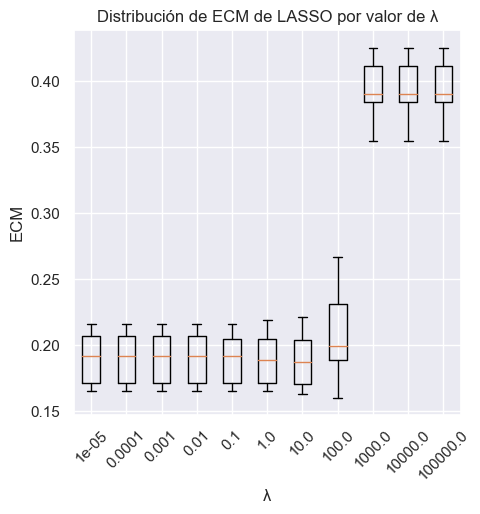

In [356]:
#Nos quedamos con la distribucón de los ECMs para cada valor de λ (LASSO)
distribucion_lambdas_LASSO = evalua_config(lambdas, 10, x, Y, 1, random_state=150)[2]

valores_LASSO = list(distribucion_lambdas_LASSO.values())
etiquetas_LASSO = [str(k) for k in distribucion_lambdas_LASSO.keys()]

#Graficamos un boxplot para cada hiperparámetro que muestre la distribución de los errores de predicción obtenidos con LASSO
plt.boxplot(valores_LASSO, labels=etiquetas_LASSO)
plt.xlabel('λ')
plt.ylabel('ECM')
plt.title('Distribución de ECM de LASSO por valor de λ')
plt.xticks(rotation=45)
plt.show()

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

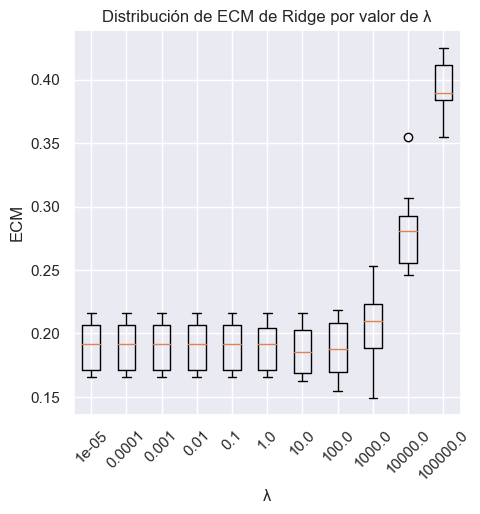

In [357]:
#Nos quedamos con la distribucón de los ECMs para cada valor de λ (Ridge)
distribucion_lambdas_Ridge = evalua_config(lambdas, 10, x, Y, 0, random_state=150)[2]

valores_Ridge = list(distribucion_lambdas_Ridge.values())
etiquetas_Ridge = [str(k) for k in distribucion_lambdas_Ridge.keys()]

#Graficamos un boxplot para cada hiperparámetro que muestre la distribución de los errores de predicción obtenidos con Ridge
plt.boxplot(valores_Ridge, labels=etiquetas_Ridge)
plt.xlabel('λ')
plt.ylabel('ECM')
plt.title('Distribución de ECM de Ridge por valor de λ')
plt.xticks(rotation=45)
plt.show()

Es importante destacar que en las dos figuras mostradas anteriormente podemos ver que el hiperparámetro cuya distribución de ECM tiene una media más pequeña es λ=10. Eso concuerda con el resultado obtenido al comienzo de este apartado 5, es decir, tanto LASSO como Ridge eligen una penalización optima de 10.

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

{1e-05: 0.010309278350515464, 0.0001: 0.010309278350515464, 0.001: 0.010309278350515464, 0.01: 0.010309278350515464, 0.1: 0.010309278350515464, 1.0: 0.020618556701030927, 10.0: 0.041237113402061855, 100.0: 0.36082474226804123, 1000.0: 0.9175257731958762, 10000.0: 0.9484536082474226, 100000.0: 0.9690721649484536}


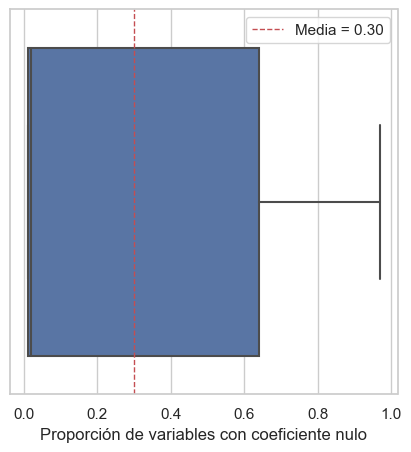

In [358]:
#Creamos un diccionario con los coeficientes (y sus variables asociadas) obtenidos para cada uno de los valores de λ definidos previamente
coeficientes_dic = {}
for elem in lambdas:
    coeficientes_dic[elem] = evalua_metodo(X_train, X_test, y_train, y_test, LogisticRegression, 3, elem, 150, "l1")[1]

#Para cada uno de los valores de λ definidos previamente, obtenemos la proporción de variables cuyos coeficientes son nulos
proporciones_cero = {}

for key, value in coeficientes_dic.items():
    coeficientes = value['Coeficiente']
    coeficientes_cero = coeficientes[coeficientes == 0]
    proporciones_cero[key] = len(coeficientes_cero) / len(coeficientes)

print(proporciones_cero)

proporciones = [v for v in proporciones_cero.values()]

#Graficamos la distribución de la proporción de variables con coeficiente nulo
sns.set(style="whitegrid")
ax = sns.boxplot(x=proporciones, orient="h")

#Agregamos una línea para marcar la media en el gráfico
media = sum(proporciones) / len(proporciones)
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label=f'Media = {media:.2f}')
plt.xlabel('Proporción de variables con coeficiente nulo')
plt.legend()
plt.show()

**Punto 6**

In [361]:
#Obtenemos una lista con las variables cuyo coficiente es nuelo cuando el hiperparámetro óptimo es 10.0 (el elegido por LASSO)
variables_coeficientes_cero = [var for var, coef in zip(coeficientes_dic[0.01]['Variable'], coeficientes_dic[10.0]['Coeficiente']) if coef == 0]

print(variables_coeficientes_cero)

['PP04B2', 'II5_1', 'II6_1', 'VII2_4']


Las variables descartadas fueron:

- Cantidad de casas en la que trabaja (PP04B2)
    
- Utiliza el cuarto de cocina, el lavadero o el garage para dormir (II5_1)
    
- Utiliza el cuarto de cocina, el lavadero o el garage exclusivamente como lugar de trabajo (II6_1)
    
- Otras personas que ayudan en las tareas de la casa (VII2_4)
    
Los coeficientes nulos de estas variables en el modelo eran lo esperado según nuestras intuiciones del Punto 1- Parte 1. Podemos observar que todas las variables que habíamos considerado como relevantes para predecir la pobreza han sido conservadas en la estimación del modelo. Las variables descartadas responden a características muy especificas del hogar que pueden no tener peso suficiente en la medición de la pobreza. Por ejemplo, la variable de cantidad de casas en la que trabaja responde a un subconjunto de personas que en su ocupación principal se dediquen al servicio doméstico. Si bien esta ocupación puede relacionarse con los estratos económicos más bajos,  la cantidad de casas aporta marginalmente a qué tan pobre puede ser ese hogar. De la misma manera, las variables sobre el uso de esos espacios (garage, lavadero, cuarto de cocina) responden a cuestiones minuciosas sobre la infraestructura del hogar, mientras que para la predicción de pobreza suele ser relevante tener en cuenta cuestiones generales como el tipo de piso de la vivienda (variable considerada en el punto 1).

**Punto 7**

In [362]:
#Con la funcion "evalua_config" podemos ver los ECMs asociados a cada uno de los valores de λ y a cada uno de los métodos.
evalua_config(lambdas, 10, x, Y, l1=3, random_state=150)

#Teniendo en cuenta los parámetros λ definidos en el punto 5, el método de regularización LASSO es el que funciona mejor.
#En particular, el parámetro de regularización LASSO que minimiza el ECM es 10.0 y está asociado a un ECM de 0.1881397504456328.
#Por otro lado, el parámetro de regularización Ridge que minimiza el ECM es 10.0 y está  asociado a un ECM de 0.18760926916221032, que es mayor que el anterior.

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

(10.0,
 'LASSO',
 {1e-05: 0.19001212121212122,
  0.0001: 0.19001212121212122,
  0.001: 0.19001212121212122,
  0.01: 0.19001212121212122,
  0.1: 0.18974545454545455,
  1.0: 0.18921069518716577,
  10.0: 0.1881397504456328,
  100.0: 0.20894973262032085,
  1000.0: 0.39338110516934044,
  10000.0: 0.39338110516934044,
  100000.0: 0.39338110516934044},
 {1e-05: 0.19001212121212122,
  0.0001: 0.19001212121212122,
  0.001: 0.19001212121212122,
  0.01: 0.19001212121212122,
  0.1: 0.19001212121212122,
  1.0: 0.18947807486631016,
  10.0: 0.18760926916221032,
  100.0: 0.1878752228163993,
  1000.0: 0.20682139037433156,
  10000.0: 0.2818096256684492,
  100000.0: 0.39338110516934044})

**Punto 8**

In [363]:
#Usamos la función evalua_multiples_metodos para comparar cuál de los métodos predice mejor. 
#Usamos los hiperparámetros definidos en el punto 5, 10 particiones de cross validation y 3 vecinos.
evalua_multiples_metodos (10, 3, lambdas, X_train, X_test , y_train, y_test, x, Y, random_state =150)

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/florenciaruiz/anac

,Modelo,Hiperparametro,AUC,Accuracy,False Negative Rate,True Negative Rate,False Positve Rate,True Positive Rate,ECM,k_KNN
0,Regresión logística,"(10.0, LASSO)",0.500000,0.606222,1.000000,1.000000,0.000000,0.000000,0.393778,NA
1,Análisis de discriminante lineal,NA,0.780625,0.803556,0.327314,0.888563,0.111437,0.672686,0.196444,NA
2,KNN,NA,0.713388,0.730667,0.367946,0.794721,0.205279,0.632054,0.269333,3


Tanto el valor de la *accuracy* como la tasa de verdaderos negativos y la de falsos positivos indican que el método de Regresión logística es el que mejor predice. En particular, el hiperparámetro de penalizacion óptimo para este método es igual a 10, este se obtiene usando método de regularización LASSO. Sin embargo, hay que mencionar que otras métricas indican que el mejor método sería Análisis de discriminante lineal. En particular, el valor de la tasa de falsos negativos, el de la tasa de verdaderos positivos y el error cuadrático medio indican este resultado. 

**Punto 9**

In [364]:
#Agregamos la constante a la base "norespondieron"
norespondieron['const']=1
#Debido a que el método de análisis de discriminante lineal (adl) tiene un menor ECM que regresión logística, decidimos ajustar el modelo usando adl
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, y_train)
prediccion_pobres_lda=lda.predict(norespondieron)

In [365]:
#Calculamos la tasa de pobreza
cant_pobres_predichos=np.sum(prediccion_pobres_lda)
print("Predicción de la proporción de hogares pobres:", (np.sum(cant_pobres_predichos))/(len(norespondieron))*100, "%")

Predicción de la proporción de hogares pobres: 42.2360248447205 %


Podemos observar que proporción de hogares pobres calculada en base a la submuestra de hogares que no respondieron su ingreso es prácticamente igual a la proporción de hogares pobres obtenida con la muestra de hogares que sí respondieron (42.21%).